# [Table Of Contents](#)
### The Art of Data Storytelling

# The Global Superstore Case

This page contains student files for the case "Modern Retail Analytics: Data Visualization Using Tableau." It includes three detailed tutorials that can be used by instructors in the classroom to introduce students to Tableau and Data Storytelling in the context of retail strategy and operations (using the [Global Superstore dataset](files/Global.Superstore.xlsx) that is made available with Tableau). 

### Assignment Three

1. Assess Nigeria’s profitability (i.e., total profit) for 2014. How does it compare to other African countries?
2. What factors might be responsible for Nigeria’s poor performance? You might want to investigate shipping costs and the average discount as potential root causes.

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [236]:
# dataStore = pd.read_csv('Global.Superstore.xlsx', error_bad_lines=False)
# df = pd.read_csv("Global.Superstore.xlsx")
fileName="Global.Superstore.xlsx"
df = pd.read_excel(fileName)

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2014-07-31,2014-07-31 00:00:00,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2015-02-05,2015-02-07 00:00:00,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2015-10-17,2015-10-18 00:00:00,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2015-01-28,2015-01-30 00:00:00,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2015-11-05,2015-11-06 00:00:00,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [44]:
print(df.shape)
print(df.columns)

(51290, 24)
Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')


In [106]:
# countries_profit_region=df[["Country","Profit","Region"]]
# countries_profit.head()
# africa_profit=countries_profit_region[countries_profit_region["Region"]=="Africa"]
# africa_profit.head()

In [4]:
africaProfitData = df[df["Region"]=="Africa"]
africaProfitData.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
4,47221,SG-2013-4320,2015-11-05,2015-11-06 00:00:00,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical
19,49463,TZ-2014-8190,2016-12-05,2016-12-07 00:00:00,Second Class,RH-9555,Ritsa Hightower,Consumer,Uvinza,Kigoma,...,OFF-KIT-10004058,Office Supplies,Appliances,"KitchenAid Stove, White",3409.74,6,0.0,818.28,763.38,High
35,47905,CG-2011-8610,2013-09-14,2013-09-15 00:00:00,First Class,AH-30,Aaron Hawkins,Corporate,Kamina,Katanga,...,TEC-APP-10000308,Technology,Phones,"Apple Smart Phone, Full Size",3817.26,6,0.0,1068.66,678.15,High
54,42336,MZ-2013-3690,2015-12-18,2015-12-18 00:00:00,Same Day,DG-3300,Deirdre Greer,Corporate,Maputo,Cidade De Maputo,...,TEC-MOT-10002272,Technology,Phones,"Motorola Smart Phone, with Caller ID",2582.16,4,0.0,593.88,627.17,High
72,49085,CG-2013-6110,2015-03-29,2015-03-31 00:00:00,Second Class,BW-1065,Barry Weirich,Consumer,Kananga,Kasai-Occidental,...,FUR-HAR-10002873,Furniture,Chairs,"Harbour Creations Executive Leather Armchair, ...",3808.80,8,0.0,1523.52,588.13,High


In [9]:
# profit_grouped_country=africa_profit[["Country","Profit"]].groupby("Country").describe()
# profit_grouped_country.head()
profit_Country=africaProfitData[["Country", "Profit","Sales","Shipping Cost","Discount"]]
profit_grouped_country =profit_Country.groupby("Country").agg(["sum","mean"])
profit_grouped_country.head()


Profit                Sales             Shipping Cost             \
              sum       mean       sum        mean           sum       mean   
Country                                                                       
Algeria   9106.50  46.461735  36091.59  184.140765       3726.41  19.012296   
Angola    6494.97  53.237459  25554.00  209.459016       2418.40  19.822951   
Benin     1349.19  38.548286   6212.07  177.487714        653.32  18.666286   
Burundi    103.08  51.540000    267.72  133.860000         18.51   9.255000   
Cameroon  5664.75  51.497727  22349.37  203.176091       2713.03  24.663909   

         Discount       
              sum mean  
Country                 
Algeria       0.0  0.0  
Angola        0.0  0.0  
Benin         0.0  0.0  
Burundi       0.0  0.0  
Cameroon      0.0  0.0

In [43]:
profit_grouped_country_sorted = profit_grouped_country.sort_values([("Profit","sum")])
profit_grouped_country_sorted.head()

Profit                 Sales            Shipping Cost  \
                         sum       mean        sum       mean           sum   
Country                                                                       
Nigeria           -80750.718 -89.227313  54350.352  60.055638       6183.11   
Zimbabwe           -5428.785 -67.859812   3765.105  47.063813        476.22   
Uganda             -2426.085 -65.569865   1621.935  43.836081        165.89   
Equatorial Guinea     44.460  14.820000    150.510  50.170000          9.38   
Eritrea               76.200  38.100000    187.740  93.870000          8.55   

                            Discount       
                       mean      sum mean  
Country                                    
Nigeria            6.832166    633.5  0.7  
Zimbabwe           5.952750     56.0  0.7  
Uganda             4.483514     25.9  0.7  
Equatorial Guinea  3.126667      0.0  0.0  
Eritrea            4.275000      0.0  0.0

In [139]:
# africaProfitData[["Country", "Profit","Sales","Shipping Cost","Discount"]].groupby("Country").agg({'Profit': ["count",'min', 'max', 'median', 'skew'],
#              'Sales': ['min', 'max', 'median', 'mean']}).sort_values("Profit")

In [178]:
profit_grouped_country_sorted["Countries"]=profit_grouped_country_sorted.index
profit_grouped_country_sorted[:10]

Profit                 Sales              \
                             sum       mean        sum        mean   
Country                                                              
Nigeria               -80750.718 -89.227313  54350.352   60.055638   
Zimbabwe               -5428.785 -67.859812   3765.105   47.063813   
Uganda                 -2426.085 -65.569865   1621.935   43.836081   
Equatorial Guinea         44.460  14.820000    150.510   50.170000   
Eritrea                   76.200  38.100000    187.740   93.870000   
Swaziland                 86.760  43.380000    288.030  144.015000   
Chad                      90.000  45.000000   1317.030  658.515000   
Burundi                  103.080  51.540000    267.720  133.860000   
South Sudan              186.360  93.180000   1045.620  522.810000   
Republic of the Congo    280.740  46.790000   2713.230  452.205000   

                      Shipping Cost             Discount       \
                                sum        mean      sum mean   
Country                                                         
Nigeria                     6183.11    6.832166    633.5  0.7   
Zimbabwe                     476.22    5.952750     56.0  0.7   
Uganda                       165.89    4.483514     25.9  0.7   
Equatorial Guinea              9.38    3.126667      0.0  0.0   
Eritrea                        8.55    4.275000      0.0  0.0   
Swaziland                     53.08   26.540000      0.0  0.0   
Chad                         297.94  148.970000      0.0  0.0   
Burundi                       18.51    9.255000      0.0  0.0   
South Sudan                   81.71   40.855000      0.0  0.0   
Republic of the Congo        355.82   59.303333      0.0  0.0   

                                   Countries  
                                              
Country                                       
Nigeria                              Nigeria  
Zimbabwe                            Zimbabwe  
Uganda                                Uganda  
Equatorial Guinea          Equatorial Guinea  
Eritrea                              Eritrea  
Swaziland                          Swaziland  
Chad                                    Chad  
Burundi                              Burundi  
South Sudan                      South Sudan  
Republic of the Congo  Republic of the Congo

In [92]:
def dataC(Class,Subclass,x):
    return profit_grouped_country_sorted[profit_grouped_country_sorted["Countries"]==x][(Class,Subclass)]

In [ ]:
 normalize.col = function(data, orig.col, new.col) {

   val.range = range(data[, orig.col])
   data[, new.col] = (data[, orig.col] - val.range[1])/(val.range[2] - val.range[1])

   data
}

In [118]:
dataC("Sales","sum","Morocco")

Country
Morocco    87077.94
Name: (Sales, sum), dtype: float64

In [222]:
print("Nigeria total profit for 2014 :"+ str(dataC("Profit","sum","Nigeria")[0]))

Nigeria total profit for 2014 :-80750.71799999978


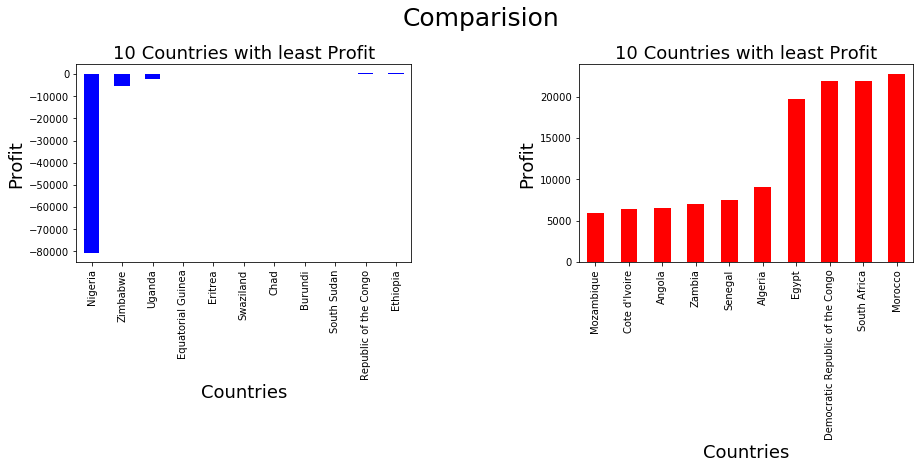

In [217]:
fig=plt.figure(1)
ax1 = plt.subplot(221)
profit_grouped_country_sorted[('Profit',"sum")][0:11].plot.bar(x='Countries', y='Profit', ax=ax1, figsize=(15, 8), title='10 Countries with least Profit',color ="blue")
plt.xlabel("Countries",fontsize=18)
plt.ylabel("Profit",fontsize=18)
plt.suptitle('Comparision', fontsize=25)
plt.title('10 Countries with least Profit', size = 18)
ax2 = plt.subplot(222)
profit_grouped_country_sorted[('Profit',"sum")][-10:].plot.bar(x='Countries', y='Profit', ax=ax2, figsize=(15, 8), title='10 Countries with highest Profit',color="red")
plt.xlabel("Countries",fontsize=18)
plt.ylabel("Profit",fontsize=18)
plt.title('10 Countries with least Profit', size = 18)
fig.subplots_adjust(wspace=.5)
plt.show()

In [220]:
profit_grouped_country_sorted[[('Profit',"sum"),('Shipping Cost',"mean")]][:10]

,Profit,Shipping Cost
,sum,mean
Country,,
Nigeria,-80750.718,6.832166
Zimbabwe,-5428.785,5.952750
Uganda,-2426.085,4.483514
Equatorial Guinea,44.460,3.126667
Eritrea,76.200,4.275000
Swaziland,86.760,26.540000
Chad,90.000,148.970000
Burundi,103.080,9.255000


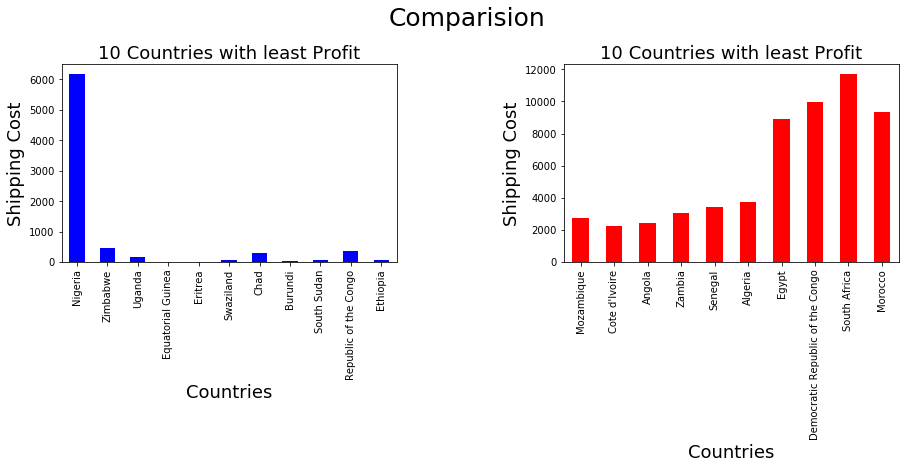

In [197]:
fig=plt.figure(1)
ax1 = plt.subplot(221)
profit_grouped_country_sorted[('Shipping Cost',"sum")][0:11].plot.bar(x='Countries', y='Profit', ax=ax1, figsize=(15, 8), title='10 Countries with least Profit',color ="blue")
plt.xlabel("Countries",fontsize=18)
plt.ylabel("Shipping Cost",fontsize=18)
plt.suptitle('Comparision', fontsize=25)
plt.title('10 Countries with least Profit', size = 18)
ax2 = plt.subplot(222)
profit_grouped_country_sorted[('Shipping Cost',"sum")][-10:].plot.bar(x='Countries', y='Profit', ax=ax2, figsize=(15, 8), title='10 Countries with highest Profit',color="red")
plt.xlabel("Countries",fontsize=18)
plt.ylabel("Shipping Cost",fontsize=18)
plt.title('10 Countries with least Profit', size = 18)
fig.subplots_adjust(wspace=.5)
plt.show()

In [298]:
# adding a normalized columns for variable
val=profit_grouped_country_sorted[[('Profit',"sum"),('Shipping Cost',"mean")]][[('Profit',"sum")]].to_numpy().ravel()
val1=profit_grouped_country_sorted[[('Profit',"sum"),('Shipping Cost',"mean")]][[('Shipping Cost',"mean")]].to_numpy().ravel()
val2=profit_grouped_country_sorted[[('Profit',"sum"),('Shipping Cost',"mean"),('Discount',"mean")]][[('Discount',"mean")]].to_numpy().ravel()
norm_prof = [(i-min(val))/(max(val)-min(val)) for i in val]
norm_ship = [(i-min(val1))/(max(val1)-min(val1)) for i in val1]
norm_disc = [(i-min(val2))/(max(val2)-min(val2)) for i in val1]

profit_grouped_country_sorted["profit_sum_normalized"]=norm_prof
profit_grouped_country_sorted["Shipping_mean_normalized"]=norm_ship
profit_grouped_country_sorted["Discount_mean_normalized"]=norm_disc

In [300]:
profit_grouped_country_sorted[["profit_sum_normalized","Shipping_mean_normalized"]][0:5]

,profit_sum_normalized,Shipping_mean_normalized
,,
Country,,
Nigeria,0.000000,0.025407
Zimbabwe,0.727663,0.019378
Uganda,0.756671,0.009303
Equatorial Guinea,0.780538,0.000000
Eritrea,0.780845,0.007874


In [293]:
# fig=plt.figure(1)
# ax1 = plt.subplot(221)
# profit_grouped_country_sorted[["profit_sum_normalized","Shipping_mean_normalized"]][0:11].plot.bar( ax=ax1, figsize=(20, 8), title='10 Countries with least Profit')
# plt.xlabel("Countries",fontsize=18)
# plt.ylabel("Shipping Cost",fontsize=18)
# # plt.suptitle('Comparision', fontsize=25)
# plt.title('10 Countries with least Profit', size = 18)
# # ax2 = plt.subplot(222)
# # profit_grouped_country_sorted[["profit_sum_normalized","Shipping_mean_normalized"]][-10:0].plot.bar( ax=ax2, figsize=(15, 8), title='10 Countries with highest Profit',color="red")
# # plt.xlabel("Countries",fontsize=18)
# # plt.ylabel("Shipping Cost",fontsize=18)
# # plt.title('10 Countries with least Profit', size = 18)
# # fig.subplots_adjust(wspace=.5)
# plt.show()

In [306]:
#Creating a newdataframe from existing one newdf=profit_grouped_country_sorted
newdf=profit_grouped_country_sorted
newdf=newdf.drop(["Shipping Cost","Discount","Sales","profit_sum_normalized","Shipping_mean_normalized","Profit","Discount_mean_normalized"],1)
newdf=newdf.assign(Profit_sum = val, Shipping_mean= val1,Discount_mean=val2)
newdf[:10]


,Countries,Profit_sum,Shipping_mean,Discount_mean
,,,,
Country,,,,
Nigeria,Nigeria,-80750.718,6.832166,0.7
Zimbabwe,Zimbabwe,-5428.785,5.952750,0.7
Uganda,Uganda,-2426.085,4.483514,0.7
Equatorial Guinea,Equatorial Guinea,44.460,3.126667,0.0
Eritrea,Eritrea,76.200,4.275000,0.0
Swaziland,Swaziland,86.760,26.540000,0.0
Chad,Chad,90.000,148.970000,0.0
Burundi,Burundi,103.080,9.255000,0.0
